# Домашняя работа
Нужно придумать небольшую базу данных и написать к ней запросы.

В базе должно быть минимум 4 таблицы и хотя бы две связи вида one-to-many или many-to-many. Можно решить как при помощи pandas, так и при помощи SQL.

Запросы должны быть осмысленными и должны решать какую-то задачу.

# Easy
Выгрузить данные и отфильтровать их по какому-то значению.

# Normal
Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

# Hard
Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.

In [2]:
# Создаем базу данных
import sqlite3
import pandas as pd
sql = sqlite3.connect('/home/euegene/learn/DS_Learn/Data/TVshows.db')

In [3]:
#Таблица с программами
programs = ["Адмирал", "Контрибуция", "Армагеддон","Терминатор","Доспехи бога"]
programs_df = pd.DataFrame({'name_programs': programs})
programs_df

,name_programs
0,Адмирал
1,Контрибуция
2,Армагеддон
3,Терминатор
4,Доспехи бога


In [4]:
programs_df.to_sql('programs', sql, index_label="id", if_exists='replace') # Сохраним в базу
pd.read_sql("SELECT * FROM programs", sql) # Проверим, что сохранилось правильно

,id,name_programs
0,0,Адмирал
1,1,Контрибуция
2,2,Армагеддон
3,3,Терминатор
4,4,Доспехи бога


In [5]:
#Таблица с жанрами
genre = ["Триллер", "Боевик", "Фантастика","Комедия","Ужасы"]
genre_df = pd.DataFrame({'name_genre': genre})
genre_df

,name_genre
0,Триллер
1,Боевик
2,Фантастика
3,Комедия
4,Ужасы


In [6]:
genre_df.to_sql('genre', sql, index_label="id", if_exists='replace') # Сохраним в базу
pd.read_sql("SELECT * FROM genre", sql) # Проверим, что сохранилось правильно

,id,name_genre
0,0,Триллер
1,1,Боевик
2,2,Фантастика
3,3,Комедия
4,4,Ужасы


In [7]:
#Таблица с поставщиками
supplier = ["20 век фокс", "Ленфильм", "Мирамакс","ООО Кинодом","Фильм-дистрибуция"]
supplier_df = pd.DataFrame({'name_supplier': supplier})
supplier_df

,name_supplier
0,20 век фокс
1,Ленфильм
2,Мирамакс
3,ООО Кинодом
4,Фильм-дистрибуция


In [8]:
supplier_df.to_sql('supplier', sql, index_label="id", if_exists='replace') # Сохраним в базу
pd.read_sql("SELECT * FROM supplier", sql) # Проверим, что сохранилось правильно

,id,name_supplier
0,0,20 век фокс
1,1,Ленфильм
2,2,Мирамакс
3,3,ООО Кинодом
4,4,Фильм-дистрибуция


In [9]:
#Таблица с показанными программами в течение дня
pgm_id = [1, 0, 2, 3, 1, 4, 0, 1, 2, 4]
rate = [3, 2, 2, 4, 5, 8, 13, 15, 12, 8] #рейтинг
adv_cost = [13, 2, 16, 13, 14, 13, 9, 2, 5, 6] #стоимость рекламы
show_cost = [8, 1, 17, 5, 6, 7, 9, 1, 2, 3] #стоимость показа

shows_df = pd.DataFrame({
    'pgm_id': pgm_id,
    'rate': rate,
    'adv_cost': adv_cost,
    'show_cost': show_cost,
})

In [10]:
shows_df.to_sql("shows", sql, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM shows", sql)

,id,pgm_id,rate,adv_cost,show_cost
0,0,1,3,13,8
1,1,0,2,2,1
2,2,2,2,16,17
3,3,3,4,13,5
4,4,1,5,14,6
5,5,4,8,13,7
6,6,0,13,9,9
7,7,1,15,2,1
8,8,2,12,5,2
9,9,4,8,6,3


In [11]:
#Таблица с соотвием жанра и программы
pgm_id = [0, 1, 2, 3, 4]
genre_id = [0, 1, 2, 4, 3] 

genre_pgm_df = pd.DataFrame({
    'pgm_id': pgm_id,
    'genre_id': genre_id
    })

In [12]:
genre_pgm_df.to_sql("genres_pgm", sql, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM genres_pgm", sql)

,id,pgm_id,genre_id
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,4
4,4,4,3


In [13]:
#Таблица с соотвием программы и поставщика
pgm_id = [0, 1, 2, 3, 4]
supplier_id = [0, 2, 1, 4, 3] 

supplier_pgm_df = pd.DataFrame({
    'pgm_id': pgm_id,
    'supplier_id': supplier_id
    })

In [14]:
supplier_pgm_df.to_sql("supplier_pgm", sql, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM supplier_pgm", sql)

,id,pgm_id,supplier_id
0,0,0,0
1,1,1,2
2,2,2,1
3,3,3,4
4,4,4,3


In [15]:
#выгрузка данных по показам программ , где стоимость рекламы в показе (adv_cost) больше 10
pd.read_sql('''
SELECT s.rate as Rating ,s.adv_cost as Advertising_cost, p.name_programs as Title ,g.name_genre as Genre, su.name_supplier as Supplier
FROM shows as s
LEFT JOIN programs as p ON s.pgm_id = p.id 
LEFT JOIN genres_pgm as gp ON s.pgm_id = gp.pgm_id
JOIN genre as g ON gp.genre_id = g.id
JOIN supplier_pgm as sp ON s.pgm_id = sp.pgm_id
JOIN supplier as su ON sp.supplier_id = su.id
WHERE Rating > 10
''', sql)


,Rating,Advertising_cost,Title,Genre,Supplier
0,13,9,Адмирал,Триллер,20 век фокс
1,15,2,Контрибуция,Боевик,Мирамакс
2,12,5,Армагеддон,Фантастика,Ленфильм


In [16]:
#считаем средние средний рейтинг и суммарную стоимость показов 
pd.read_sql('''
SELECT AVG(s.rate) as AVG_Rating, SUM(s.adv_cost) AVG_Advertising_cost, p.name_programs as Title ,g.name_genre as Genre, su.name_supplier as Supplier
FROM shows as s
LEFT JOIN programs as p ON s.pgm_id = p.id 
LEFT JOIN genres_pgm as gp ON s.pgm_id = gp.pgm_id
JOIN genre as g ON gp.genre_id = g.id
JOIN supplier_pgm as sp ON s.pgm_id = sp.pgm_id
JOIN supplier as su ON sp.supplier_id = su.id
GROUP BY Title
''', sql)

,AVG_Rating,AVG_Advertising_cost,Title,Genre,Supplier
0,7.500000,11,Адмирал,Триллер,20 век фокс
1,7.000000,21,Армагеддон,Фантастика,Ленфильм
2,8.000000,19,Доспехи бога,Комедия,ООО Кинодом
3,7.666667,29,Контрибуция,Боевик,Мирамакс
4,4.000000,13,Терминатор,Ужасы,Фильм-дистрибуция


In [33]:
new_df = pd.read_sql('''
SELECT SUM(s.rate) as Rating ,MAX(s.adv_cost) as Advertising_cost, p.name_programs as Title ,g.name_genre as Genre, su.name_supplier as Supplier
FROM shows as s
LEFT JOIN programs as p ON s.pgm_id = p.id 
LEFT JOIN genres_pgm as gp ON s.pgm_id = gp.pgm_id
JOIN genre as g ON gp.genre_id = g.id
JOIN supplier_pgm as sp ON s.pgm_id = sp.pgm_id
JOIN supplier as su ON sp.supplier_id = su.id
GROUP BY Genre
''', sql)
new_df

,Rating,Advertising_cost,Title,Genre,Supplier
0,23,14,Контрибуция,Боевик,Мирамакс
1,16,13,Доспехи бога,Комедия,ООО Кинодом
2,15,9,Адмирал,Триллер,20 век фокс
3,4,13,Терминатор,Ужасы,Фильм-дистрибуция
4,14,16,Армагеддон,Фантастика,Ленфильм


In [50]:
#вычислим и выведем суммарную маржинальность показов по всем жанрам
new_df2 = pd.read_sql('''
SELECT (SUM(s.adv_cost) - SUM(s.show_cost)) as Margin, AVG(s.rate) as Rating, g.name_genre as Genre, su.name_supplier as Supplier
FROM shows as s
LEFT JOIN genres_pgm as gp ON s.pgm_id = gp.pgm_id
JOIN genre as g ON gp.genre_id = g.id
JOIN supplier_pgm as sp ON s.pgm_id = sp.pgm_id
JOIN supplier as su ON sp.supplier_id = su.id
GROUP BY Genre
''', sql)
new_df2


,Margin,Rating,Genre,Supplier
0,14,7.666667,Боевик,Мирамакс
1,9,8.000000,Комедия,ООО Кинодом
2,1,7.500000,Триллер,20 век фокс
3,8,4.000000,Ужасы,Фильм-дистрибуция
4,2,7.000000,Фантастика,Ленфильм


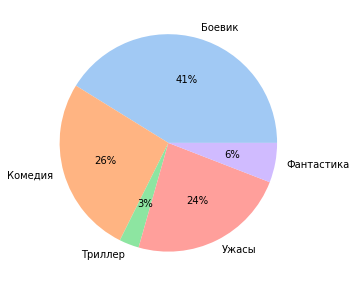

In [56]:
#покажем вызуально распределение маржинальности по жанрам
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(5,5))
plt.pie(new_df2['Margin'], labels = new_df2['Genre'], colors = colors, autopct='%.0f%%')
plt.show()

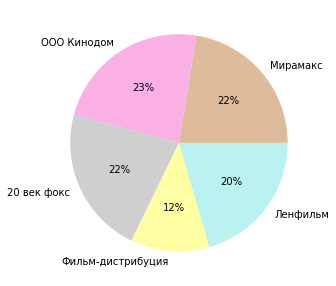

In [57]:
#покажем визуально распределение рейтинга по поставщикам контента
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette('pastel')[5:10]
plt.figure(figsize=(5,5))
plt.pie(new_df2['Rating'], labels = new_df2['Supplier'], colors = colors, autopct='%.0f%%')
plt.show()